C:\Users\memwa\AppData\Local\Temp\ipykernel_15944\3929076944.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql_query, conn)


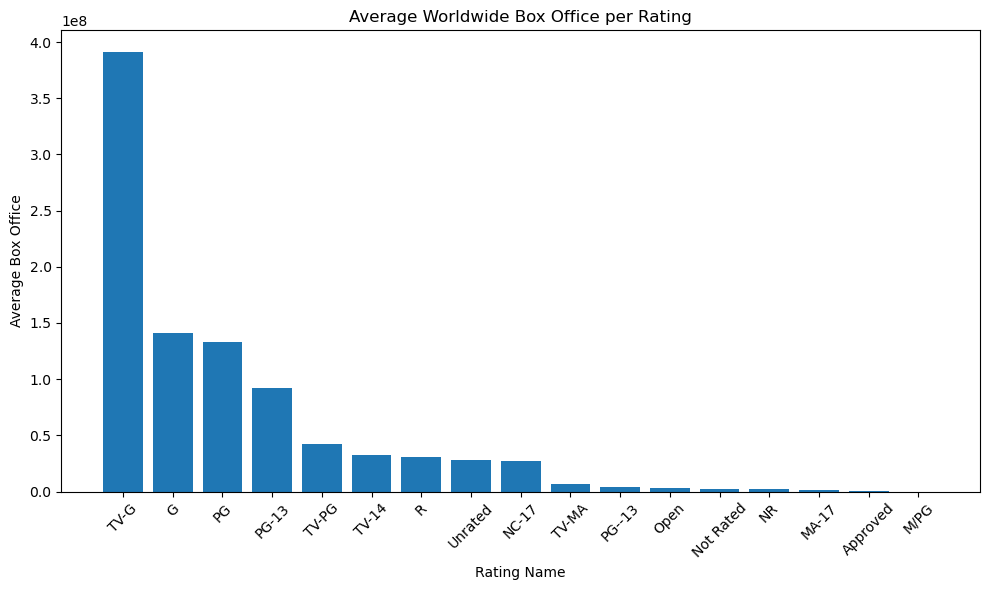

In [6]:
# Import required libraries
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization

# Define the PostgreSQL database connection parameters
db_config = {
    'dbname': 'DBmovies',
    'user': 'postgres',
    'password': 'alex2000',
    'host': 'localhost',
    'port': '5433'
}

# Establish a connection using psycopg2
conn = psycopg2.connect(**db_config)

# Create an SQLAlchemy engine using the connection
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

# Formulate the SQL query of the joined table
sql_query = """
    SELECT ratings.rating_name, AVG(movies.worldwide_box_office) AS average_worldwide_box_office
    FROM ratings
    JOIN movierating on movierating.rating_id = ratings.rating_id
    JOIN movies on movies.movie_id = movierating.movie_id
    GROUP BY ratings.rating_name
    ORDER BY average_worldwide_box_office DESC;"""

# Execute the SQL query and fetch the results
result = pd.read_sql_query(sql_query, conn)

# Create a bar plot to visualize the data
plt.figure(figsize=(10, 6))
plt.bar(result['rating_name'], result['average_worldwide_box_office'])  # Adjusted column name
plt.xlabel('Rating Name')
plt.ylabel('Average Box Office')
plt.title('Average Worldwide Box Office per Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
conn.close()
